<a href="https://colab.research.google.com/github/crescent98/machinelearning35911/blob/master/assignment07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

data=np.array(data)

functions


In [0]:
"""
def g_function(x,y,theta):
  sum=0
  for i in range(0,10):
    for j in range(0,10):
      sum=sum+theta[i][j]*np.power(x,i)*np.power(y,j)
  return sum
"""
def g_function(x,y,theta):
  total=0
  temp_row=np.arange(0,10)
  temp_col=np.arange(0,10).reshape(10,1)
  x_array=np.power(x,temp_row)
  y_array=np.power(y,temp_col)
  total=theta_temp1*x_array*y_array
  return total.sum()

def h_function(x,y,theta):
  return (1/(1+np.exp((-1)*g_function(x,y,theta))))

def objective_function(m,theta,data,lamb): #with a regularization term
  sum1=0
  sum2=0
  for i in range(0,m):
    if data[i][2]==0:
      sum1=sum1-np.log(1-h_function(data[i][0],data[i][1],theta))
    elif data[i][2]==1:
      sum1=sum1-np.log(h_function(data[i][0],data[i][1],theta))
  sum2=np.power(theta,2)
  sum2=sum2.sum()
  return sum1/m+lamb/2*sum2

def next_theta(m,a, theta,data,lamb): #theta is 10*10 matrix
  temp=np.zeros((10,10))
  x=np.arange(0,10)
  y=np.arange(0,10).reshape(10,1)
  for i in range(0,m):
    temp=temp+(h_function(data[i][0],data[i][1],theta)-data[i][2])*np.power(data[i][0],x)*np.power(data[i][1],y)
  theta_temp=theta*(1-lamb*a)-temp*a/m
  #theta_temp[0][0]
  sum=0
  for i in range(0,m):
    sum=sum+h_function(data[i][0],data[i][1],theta)-data[i][2]
  the_sum=theta[0][0]-sum*a/m
  theta_temp[0][0]=the_sum
  return theta_temp

def gradient(theta,m,data,lamb):
  sum=[]
  sum_temp=0
  total=0
  # theta0
  append1=sum.append(sum_temp)
  append2=sum.append(np.square(sum_temp))
  for i in range(0,m):
    sum_temp=sum_temp+h_function(data[i][0],data[i][1],theta)-data[i][2]
  append1
  # theta (!=0)
  for i in range(0,10):
    for j in range(0,10):
      sum_temp=0
      for k in range(0,m):
        sum_temp=sum_temp+h_function(data[k][0],data[k][1],theta)*np.power(data[k][0],i)*np.power(data[k][1],j)
      append2
  for i in range(0,len(sum)):
    total=total+sum[i]
  return np.sqrt(total/m)

In [0]:
def accuracy_train(theta_temp,data,accuracy):
  score_count=0
  for i in range(0,len(data)):
    if h_function(data[i][0],data[i][1],theta_temp)>1/2 and data[i][2]==1:
      score_count=score_count+1
    if h_function(data[i][0],data[i][1],theta_temp)<1/2 and data[i][2]==0:
      score_count=score_count+1
  accuracy.append(score_count/len(data))

variables

In [0]:
m=len(data)
theta_temp1=[[3,4,-6,-4,0,0,0,0,0,0],
       [2,-5,0,0,0,0,0,0,0,0],
       [-8,0,0,0,0,0,0,0,0,0],
       [0.03,0,0,0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0,0,0,0]
]
theta_temp1=np.array(theta_temp1)
theta_temp2=[[3,4,-6,-4,0,0,0,0,0,0],
       [2,-5,0,0,0,0,0,0,0,0],
       [-8,0,0,0,0,0,0,0,0,0],
       [0.03,0,0,0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0,0,0,0]
]
theta_temp2=np.array(theta_temp2)
theta_temp3=[[3,4,-6,-4,0,0,0,0,0,0],
       [2,-5,0,0,0,0,0,0,0,0],
       [-8,0,0,0,0,0,0,0,0,0],
       [0.03,0,0,0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0,0,0,0]
]
theta_temp2=np.array(theta_temp2)

lamb=100
objective1=[]
objective2=[]
objective3=[]
accuracy1=[]
accuracy2=[]
accuracy3=[]
theta1=[]
theta2=[]
theta3=[]
i=0
a=0.6

In [0]:
#first test
lamb=0
i1=0
theta_temp1=np.array(theta_temp1)

In [0]:
while i1!=20000:
  objective1.append(objective_function(m,theta_temp1,data,lamb))
  accuracy_train(theta_temp1,data,accuracy1)
  theta1.append(theta_temp1)
  theta_temp1=next_theta(m,a,theta_temp1,data,lamb)
  i1=i1+1

In [0]:
#second test
lamb=10
i2=0
theta_temp2=[[3,4,-6,-4,0,0,0,0,0,0],
       [2,-5,0,0,0,0,0,0,0,0],
       [-8,0,0,0,0,0,0,0,0,0],
       [0.03,0,0,0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0,0,0,0]
]
theta_temp2=np.array(theta_temp2)

In [0]:
while i2!=1200:
  objective2.append(objective_function(m,theta_temp2,data,lamb))
  accuracy_train(theta_temp2,data,accuracy2)
  theta2.append(theta_temp2)
  theta_temp2=next_theta(m,a,theta_temp2,data,lamb)
  i2=i2+1

In [45]:
#third test
lamb=1000
i3=0
theta_temp3=np.array(theta_temp3)
while i3<:
  objective3.append(objective_function(m,theta_temp3,data,lamb))
  accuracy_train(theta_temp3,data,accuracy3)
  theta3.append(theta_temp3)
  theta_temp3=next_theta(m,a,theta_temp3,data,lamb)
  i3=i3+1

KeyboardInterrupt: ignored

In [46]:
i3

138

# ***1. Plot the training data***

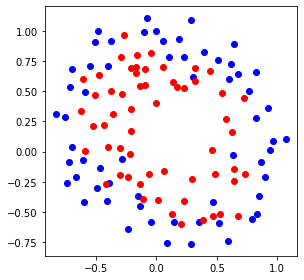

In [44]:
plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# ***2. Plot the training error with varying regularization parameters***

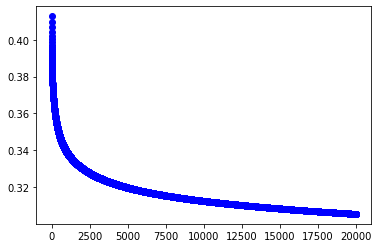

In [14]:
plt.scatter(range(0,len(objective1)),objective1,c="#0000ff")

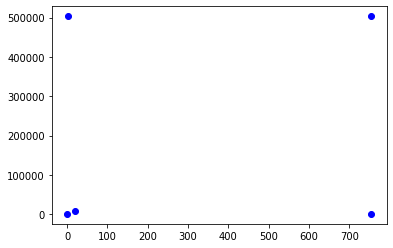

In [37]:
plt.scatter(range(0,len(objective2)),objective2,c="#0000ff")

In [0]:
plt.scatter(range(0,len(objective3)),objective3,c="#0000ff")

# ***3.Display the values of the chosen regularization parameters***

In [15]:
print("the value for regularization parameter is",0) 

the value for regularization parameter is 0


In [42]:
print("the value for regularization parameter is",10)

the value for regularization parameter is 10


In [43]:
print("the value for regularization parameter is",1000)

the value for regularization parameter is 1000


# ***4. Plot the Training Accuracy with varying regularization Parameter***

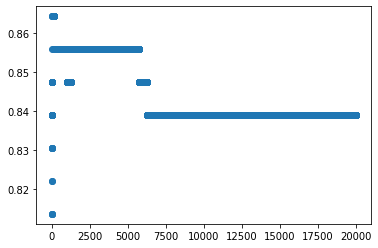

In [17]:
plt.scatter(range(0,len(accuracy1)),accuracy1)

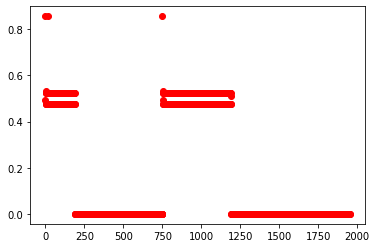

In [38]:
plt.scatter(range(0,len(accuracy2)),accuracy2,c="#ff0000")

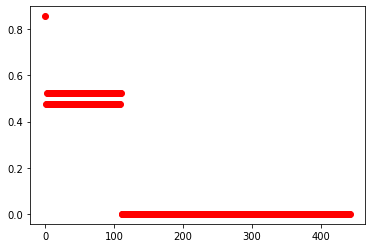

In [41]:
plt.scatter(range(0,len(accuracy3)),accuracy3,c="#ff0000")

# ***6. Plot the optimal classifier with varying regularization parameters superimposed on the training data***

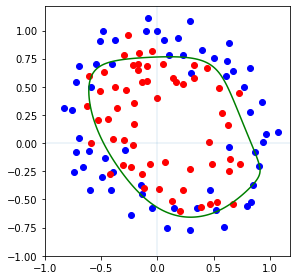

In [21]:
import matplotlib as mpl
%matplotlib inline

x=np.linspace(-1,1,400)
y=np.linspace(-1,1,400)
X,Y=np.meshgrid(x,y)

def axes():
  plt.axhline(0, alpha=.1)
  plt.axvline(0, alpha=.1)
axes()
z1=g_function(X,Y,theta_temp1)
z2=g_function(X,Y,theta_temp2)
z3=g_function(X,Y,theta_temp3)
plt.contour(x,y,z,[0],colors='g')
plt.contour(x,y,z,[0],colors='g')
plt.contour(x,y,z,[0],colors='g')
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()